# Análisis exploratorio de datos del Titanic

Fernando Ruiz Talamante A01253906

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Introducción

El Titanic fue un barco de pasajeros que se hundió en su viaje inaugural en 1912, dejando más de mil personas muertas. Este conjunto de datos contiene información sobre los pasajeros a bordo del Titanic, incluyendo su edad, género, clase de viaje y si sobrevivieron o no. Algunas preguntas que me interesan responder con este análisis son:
- ¿Cuál era la tasa de supervivencia general?
- ¿Cómo afectó el género a la supervivencia?
- ¿Cómo afectó la clase de viaje a la supervivencia?

Me gustaría descubrir si existe alguna combinación de variables que haya impactado positivamente o negativamente en la supervivencia de los pasajeros.

### Variación

Primero analizaremos 2 variables independientemente. Las variables son: Age y Fare

### Age

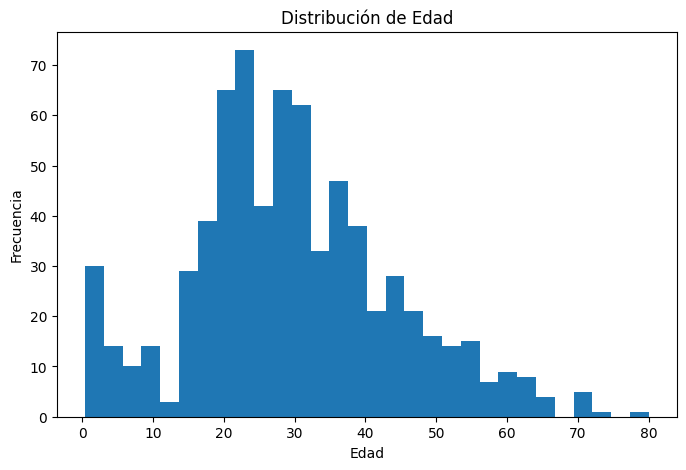

In [2]:
plt.figure(figsize=(8,5))
plt.hist(titanic['Age'].dropna(), bins=30)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')
plt.show()

### Fare

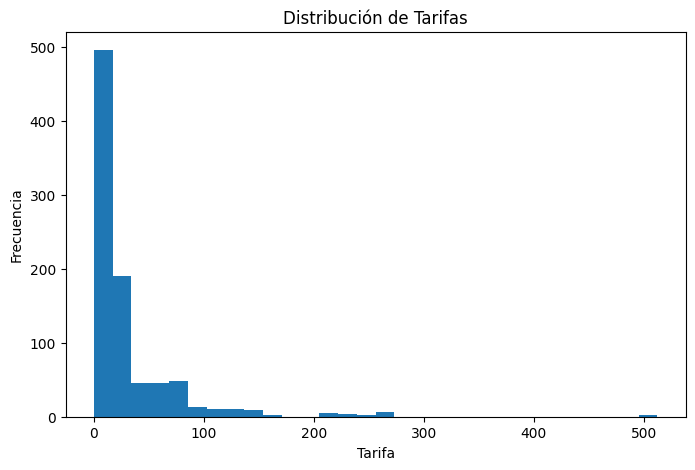

In [3]:
plt.figure(figsize=(8,5))
plt.hist(titanic['Fare'], bins=30)
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tarifas')
plt.show()

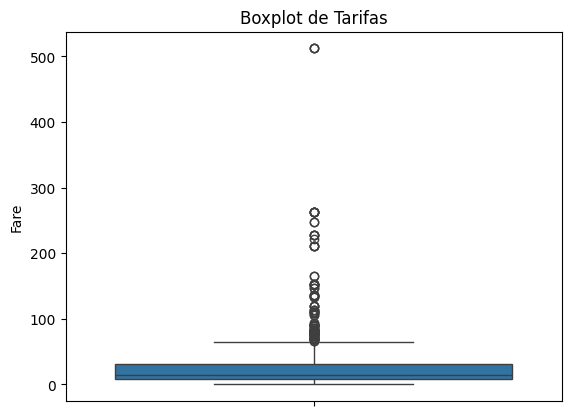

In [4]:
sns.boxplot(y=titanic['Fare'])
plt.title('Boxplot de Tarifas')
plt.show()

## Covariación

### Edad vs tarifa

¿Los pasajeros que pagaron tarifas más altas tenían mayor probabilidad de sobrevivir independientemente de su edad?

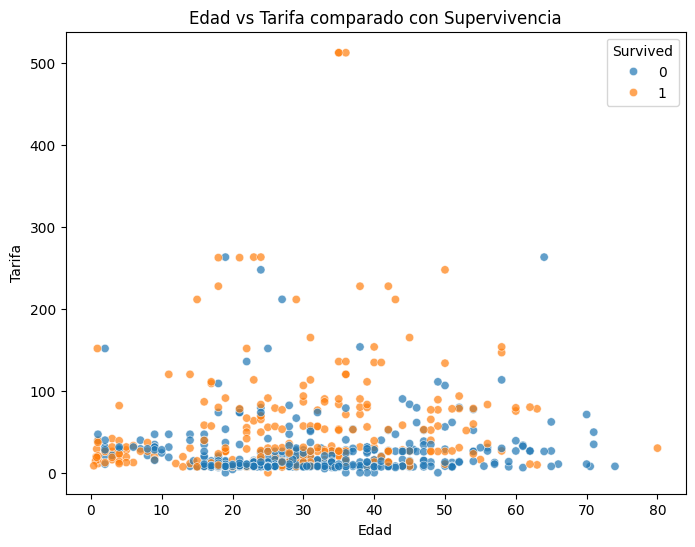

In [5]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=titanic,
    x='Age',
    y='Fare',
    hue='Survived',
    alpha=0.7
)

plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Edad vs Tarifa comparado con Supervivencia')
plt.show()


Se sabe que en el titanic las tarifas más caras si estaban más cerca de los botes salvavidas, pero también es importante considerar si la edad de los pasajeros tuvo impacto en su supervivencia.

## Edad vs Supervivencia

¿La distribución de edades fue diferente entre los pasajeros que sobrevivieron y los que no?

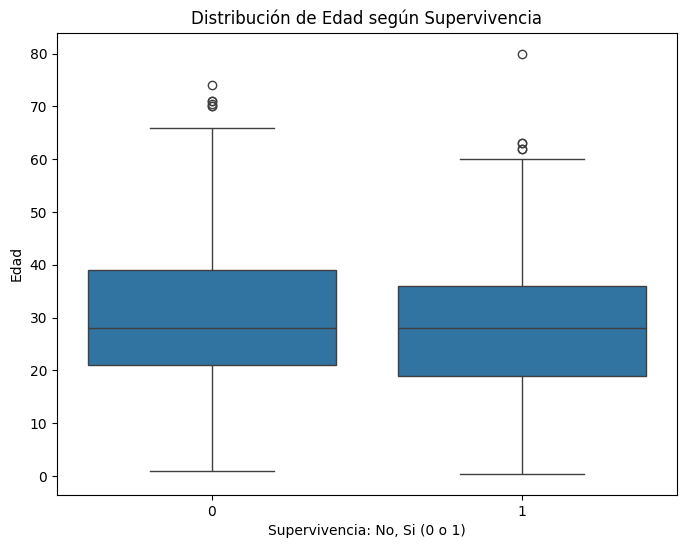

In [6]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=titanic,
    x='Survived',
    y='Age'
)

plt.xlabel('Supervivencia: No, Si (0 o 1)')
plt.ylabel('Edad')
plt.title('Distribución de Edad según Supervivencia')
plt.show()


Se sabe que la evacuación priorizó a los menores y a las mujeres, por lo que es posible que los pasajeros más jóvenes tuvieran una mayor probabilidad de sobrevivir.

## Clase, Género y Supervivencia

Cómo cambió la tasa de supervivencia según la combinación de clase social y género?

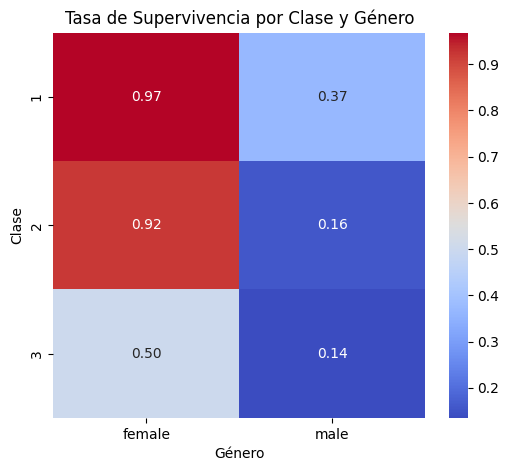

In [7]:
tabla_heatmap = titanic.pivot_table(
    values='Survived',
    index='Pclass',
    columns='Sex',
    aggfunc='mean'
)
plt.figure(figsize=(6,5))

sns.heatmap(
    tabla_heatmap,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Tasa de Supervivencia por Clase y Género')
plt.xlabel('Género')
plt.ylabel('Clase')
plt.show()


Confirmamos que las mujeres y sobre todo las de primera clase tuvieron una tasa de supervivencia mucho más alta que los hombres y los pasajeros de clases inferiores.

# Valores Faltantes

<Axes: >

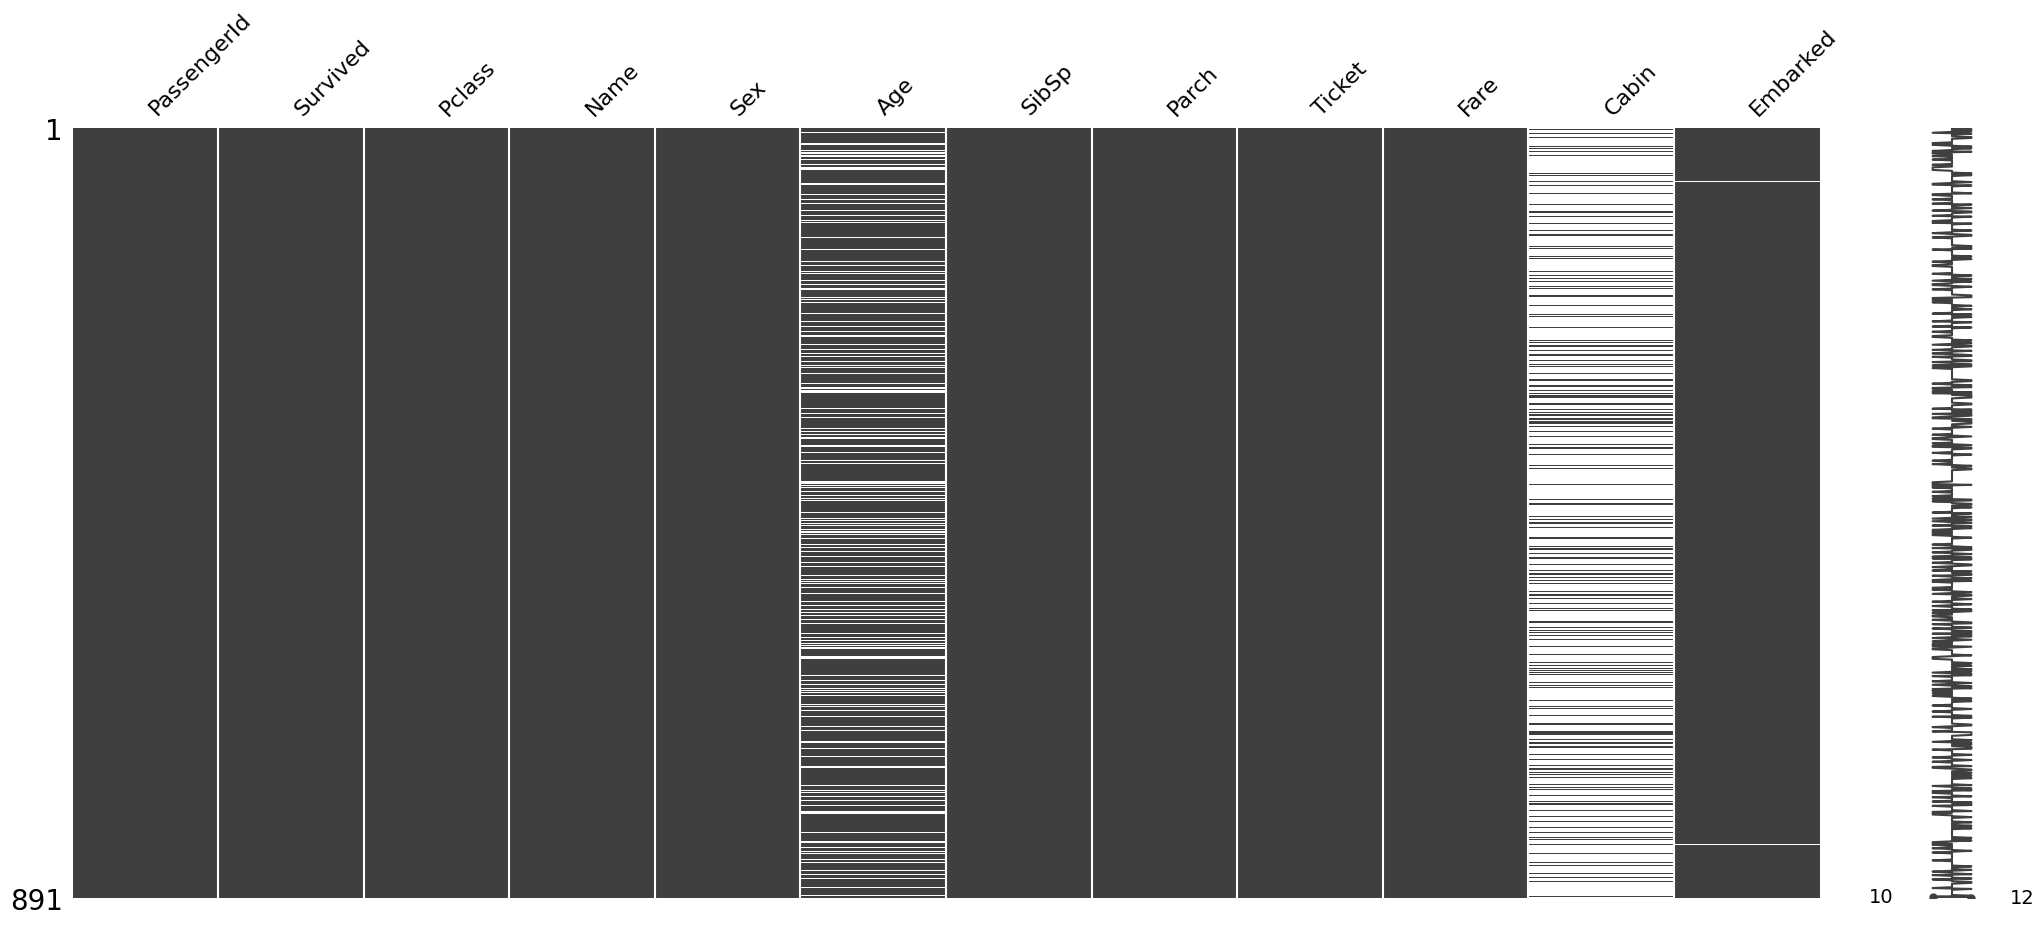

In [8]:
titanic.isnull().sum()

import missingno as msno
msno.matrix(titanic)

Podemos observar que la variable Age y Cabin tienen una cantidad significativa de valores faltantes. La variable Age es importante para nuestro análisis, por lo que podríamos considerar imputar los valores faltantes utilizando la mediana o la media de las edades. La variable Cabin tiene muchos valores faltantes, por lo que podríamos decidir eliminarla del análisis o crear una nueva variable que indique si el pasajero tenía una cabina asignada o no.

También vemos que los valores faltantes no parecen seguir un patrón específico,

## Pregunta propia

¿Viajar solo o con familia cambió la probabilidad de supervivencia, y este efecto se mantuvo por género y clase?

### Enfoque
Crearé una variable de estatus familiar (solo vs con familia) y se hará la comparación de la tasa de supervivencia por género y por clase.


In [9]:
# Crear variables de estatus familiar
titanic['family_size'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['family_status'] = np.where(titanic['family_size'] == 1, 'Solo', 'Con familia')


**Paso 1: Tasa de supervivencia por estatus familiar**

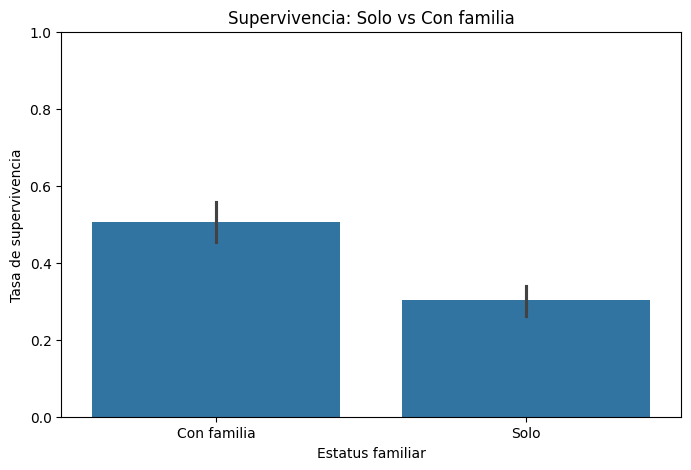

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=titanic,
    x='family_status',
    y='Survived',
    estimator=np.mean
)
plt.xlabel('Estatus familiar')
plt.ylabel('Tasa de supervivencia')
plt.title('Supervivencia: Solo vs Con familia')
plt.ylim(0, 1)
plt.show()


**Paso 2: Diferencias por género**

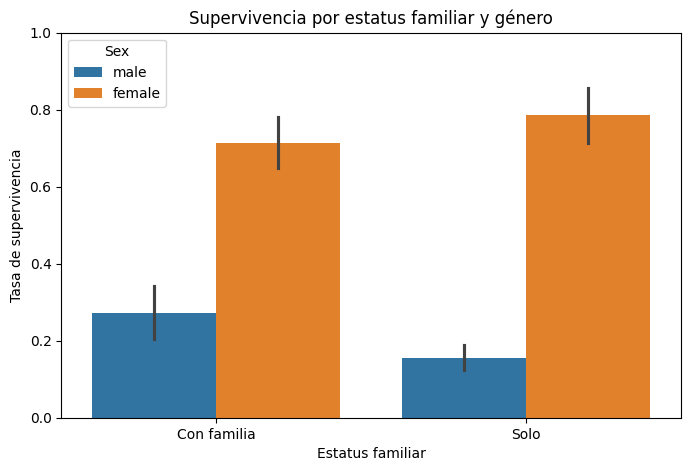

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=titanic,
    x='family_status',
    y='Survived',
    hue='Sex',
    estimator=np.mean
)
plt.xlabel('Estatus familiar')
plt.ylabel('Tasa de supervivencia')
plt.title('Supervivencia por estatus familiar y género')
plt.ylim(0, 1)
plt.show()


**Paso 3: Diferencias por clase**

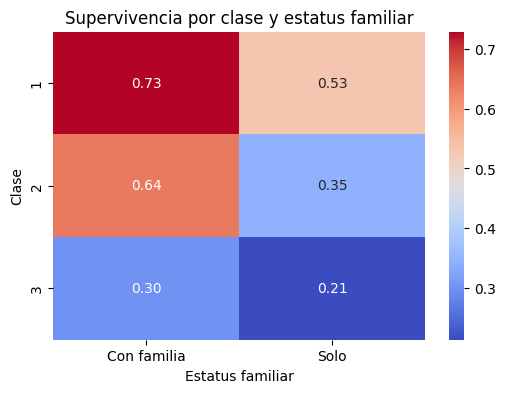

In [12]:
tabla_clase = titanic.pivot_table(
    values='Survived',
    index='Pclass',
    columns='family_status',
    aggfunc='mean'
)

plt.figure(figsize=(6, 4))
sns.heatmap(
    tabla_clase,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Supervivencia por clase y estatus familiar')
plt.xlabel('Estatus familiar')
plt.ylabel('Clase')
plt.show()


### Conclusión
En general viajar con la familia si parece asociarse con mayor supervivencia, pero no pasa igual en hombres y mujeres. Además, la clase social sigue siendo un factor fuerte porque aún con familia, las clases bajas muestran tasas menores que la primera clase.
